##Setting up Data

In [1]:
# Download Data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-06-20 06:57:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   189MB/s    in 0.8s    

2022-06-20 06:57:57 (189 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-06-20 06:57:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114

In [2]:
# Extract Files

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
# Declare variable for files

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

##Visualizing data

In [4]:
# Accesing Data Names

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse29-2.png', 'horse30-1.png', 'horse45-4.png', 'horse27-1.png', 'horse27-4.png', 'horse17-8.png', 'horse15-0.png', 'horse05-2.png', 'horse15-3.png', 'horse12-8.png']
['human11-27.png', 'human04-30.png', 'human10-25.png', 'human04-19.png', 'human07-27.png', 'human05-18.png', 'human14-09.png', 'human16-19.png', 'human11-15.png', 'human05-23.png']


In [5]:
# Data lengths

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


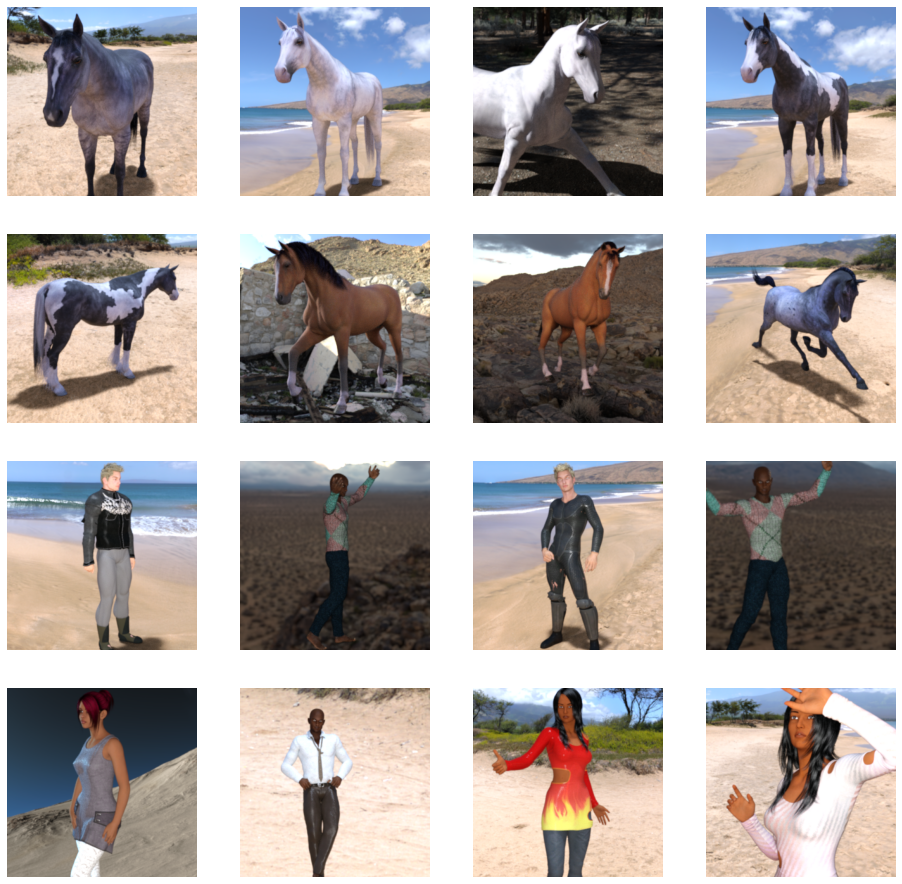

In [6]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Start

In [7]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [8]:
# Create Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                                 
])

In [9]:
# Gets the summary of the learning

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
from tensorflow.keras.optimizers import RMSprop

# Compile model with RMSprop


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Data Preprocessing

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator

train_datagen = ImageDataGenerator(rescale=1/255)

In [12]:
# Preprocess Data
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [13]:
# Fit model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=12,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/12
8/8 [==============================] - 85s 10s/step - loss: 0.8149 - acc: 0.4727
Epoch 2/12
8/8 [==============================] - 80s 10s/step - loss: 0.6711 - acc: 0.6808
Epoch 3/12
8/8 [==============================] - 80s 11s/step - loss: 0.6437 - acc: 0.6919
Epoch 4/12
8/8 [==============================] - 83s 10s/step - loss: 0.6458 - acc: 0.7608
Epoch 5/12
8/8 [==============================] - 80s 10s/step - loss: 0.5270 - acc: 0.8254
Epoch 6/12
8/8 [==============================] - 80s 10s/step - loss: 0.2994 - acc: 0.8565
Epoch 7/12
8/8 [==============================] - 80s 10s/step - loss: 0.2821 - acc: 0.9388
Epoch 8/12
8/8 [==============================] - 91s 11s/step - loss: 0.1386 - acc: 0.9453
Epoch 9/12
8/8 [==============================] - 79s 9s/step - loss: 0.4840 - acc: 0.8843
Epoch 10/12
8/8 [==============================] - 83s 10s/step - loss: 0.1265 - acc: 0.9611
Epoch 11/12
8/8 [==============================] - 91s 11s/step - loss: 0.0565 -

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving WhatsApp Image 2021-11-03 at 10.04.52.jpeg to WhatsApp Image 2021-11-03 at 10.04.52.jpeg
[0.84460044]
WhatsApp Image 2021-11-03 at 10.04.52.jpeg is a human
